### Classical Self-Assembly

## Source Code

### Algorithm

Self-assembly complete in 1 iterations.


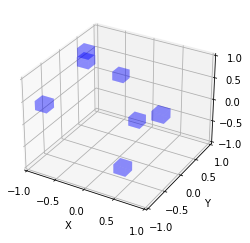

In [1]:
#Import the libraries
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

#Defining the self-assembly algorithm
def self_assemble(num_particles):
    particles = [(random.uniform(-1, 1), random.uniform(-1, 1), random.uniform(-1, 1)) for _ in range(num_particles)]
    num_iterations = 0
    
    while True:
        num_iterations += 1
        new_particles = []
        for i in range(num_particles):
            #Iterate through the particles for neighbors
            neighbors = [j for j in range(num_particles) if i != j and distance(particles[i], particles[j]) < 0.1]
            if len(neighbors) >= 2:
                #Taking the centroid as the center
                center = centroid([particles[i]] + [particles[j] for j in neighbors])
                new_particles.append(center)
            else:
                new_particles.append(particles[i])
        
        if set(new_particles) == set(particles):
            print(f"Self-assembly complete in {num_iterations} iterations.")
            return particles
        else:
            particles = new_particles

#Calculate the distance between two points
def distance(p1, p2):
    return ((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2 + (p1[2]-p2[2])**2)**0.5

#Calculate the centroid of the various points
def centroid(points):
    x = sum(p[0] for p in points) / len(points)
    y = sum(p[1] for p in points) / len(points)
    z = sum(p[2] for p in points) / len(points)
    return (x, y, z)

#Assume the number of particles is 20
num_particles = 7
particles = self_assemble(num_particles)

#Create the figure plot
fig = plt.figure()
#Create 3D plot
ax = fig.add_subplot(111, projection='3d')

#Iterate through three co-ordinates and plot it for a cube
for particle in particles:
    x = particle[0]
    y = particle[1]
    z = particle[2]
    r = 0.1 # radius of cube
    x1, y1, z1 = x - r, y - r, z - r
    x2, y2, z2 = x + r, y + r, z + r
    cube = [[x1, y1, z1], [x2, y1, z1], [x2, y2, z1], [x1, y2, z1], 
            [x1, y1, z2], [x2, y1, z2], [x2, y2, z2], [x1, y2, z2]]
    faces = [[0, 1, 2, 3], [4, 5, 6, 7], [0, 1, 5, 4], [1, 2, 6, 5], [2, 3, 7, 6], [3, 0, 4, 7]]
    #Making the points as cube in the 3D figure
    collection = Poly3DCollection([[cube[vert_id] for vert_id in face] for face in faces], alpha=0.25, facecolors='blue')
    ax.add_collection(collection)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
#Show the figure
plt.show()



In [3]:
self_assemble(40)

Self-assembly complete in 1 iterations.


[(0.6708602115294351, 0.7246178449937619, 0.7062813459929609),
 (0.6759725899136848, -0.006393847597737867, 0.5083748029927602),
 (0.713579741395679, 0.1396014763684692, -0.4245712343891166),
 (-0.38223883681477955, 0.9828139185606406, 0.20701084995251917),
 (0.1803193442433717, -0.9191008122466311, -0.5524922601807645),
 (-0.40564581120831633, -0.4027327277850741, -0.5255082016177954),
 (0.9576019661084945, -0.5457286551959832, 0.7396207550019833),
 (0.04201772915732738, 0.12321257251230544, 0.46280809285976376),
 (0.43074791732809103, -0.18971175631527193, -0.12306352600602222),
 (0.36398043305581473, -0.1572254036817411, 0.5116768757133807),
 (-0.7745481214974501, 0.1610876169671629, -0.6706672570067094),
 (-0.7138458490806578, -0.005987809778063902, 0.8967009673155233),
 (-0.16264645874140693, -0.34996104486351354, 0.4791469061537057),
 (-0.1760607780516792, -0.6364068763184734, -0.5875756097654481),
 (-0.5768388320679216, 0.4545985250914848, -0.5595909377379347),
 (0.4256993469962

# Self-Assembly Particle Swarm Optimization

## Source Code

### SAPSO Algorithm

In [24]:
#Import the libraries
import numpy as np
import random

# Define parameters
tmax = 100 # Iteration limit
m = 250 # Number of agents
C1 = 2 # Acceleration coefficient
C2 = 2 # Acceleration coefficient
w = 0.5 # Inertia weight
lookup_table = {'001': '010', '010': '100', '011': '111', '100': '101', '101': '110', '110': '011', '111': '001'}
blocks = ['001', '010', '011', '100', '101', '110', '111']
fitness_threshold = 1

# Define grid size
grid_size = (10, 10, 10)

# Define initial block position
initial_pos = np.array([4, 4, 4])

# Initialize agents' positions and velocities
positions = np.zeros((m, 3))
velocities = np.zeros((m, 3))

for i in range(m):
    positions[i] = np.random.randint(grid_size[0], size=3)
    velocities[i] = np.random.uniform(low=-1, high=1, size=3)

# Define the objective function
def objective_function(x):
    # Some arbitrary objective function
    return np.sum(x)

# Initialize global best position
global_best_pos = np.zeros(3)
global_best_fitness = float('inf')

# Start self-assembly process
t = 0
while t < tmax:
    for k in range(m):
        # Evaluate the agent's local configuration
        x = positions[k].astype(int)
        local_config = ''.join([str(int(x[i] > 0)) for i in range(3)])
        if local_config in lookup_table:
            # Build the block specified by lookup table
            block = lookup_table[local_config]
            new_pos = x + np.array([int(block[i]) - int(local_config[i]) for i in range(3)])
            # Update the position of last block
            last_block_pos = new_pos
        else:
            # Evaluate the agent's fitness
            fitness = objective_function(positions[k])
            # Update best position vector of agent
            if fitness < global_best_fitness:
                global_best_pos = positions[k]
                global_best_fitness = fitness
            # Update velocity vector
            velocities[k] = w * velocities[k] + C1 * random.uniform(0, 1) * (positions[k] - positions[k]) + C2 * random.uniform(0, 1) * (global_best_pos - positions[k])
            # Update position vector
            new_pos = positions[k] + velocities[k]
        # Check if new position is unoccupied
        if (new_pos >= 0).all() and (new_pos < grid_size).all():
            # Update position
            positions[k] = new_pos
            # Check fitness threshold
            if objective_function(last_block_pos) < fitness_threshold:
                # Update position of reference point
                initial_pos = last_block_pos
                # Reset fitness threshold
                fitness_threshold = 1
        else:
            # Decrease fitness threshold
            fitness_threshold -= 0.1
        # Move the agent at its position
        # (not shown as this is just a simulation)

    # Increment iteration index
    t += 1
    


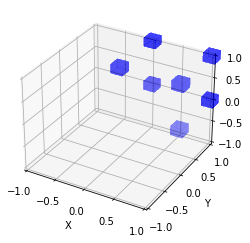

In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set cube color and transparency
cube_color = (0, 0, 1, 0.01)

# Plot cubes at agent positions
for pos in positions:
    x = pos[0]
    y = pos[1]
    z = pos[2]
    r = 0.1 # radius of cube
    x1, y1, z1 = x - r, y - r, z - r
    x2, y2, z2 = x + r, y + r, z + r
    cube = [[x1, y1, z1], [x2, y1, z1], [x2, y2, z1], [x1, y2, z1], 
            [x1, y1, z2], [x2, y1, z2], [x2, y2, z2], [x1, y2, z2]]
    faces = [[0, 1, 2, 3], [4, 5, 6, 7], [0, 1, 5, 4], [1, 2, 6, 5], [2, 3, 7, 6], [3, 0, 4, 7]]
    collection = Poly3DCollection([[cube[vert_id] for vert_id in face] for face in faces], alpha=0.01, facecolors='blue')
    ax.add_collection(collection)
    #ax.scatter(*pos, marker='s', s=100, facecolor=cube_color)

# Plot initial block position
ax.scatter(initial_pos[0], initial_pos[1], initial_pos[2], color='red', marker='o', s=10)

# Set axis limits and labels
ax.set_xlim([0, grid_size[0]])
ax.set_ylim([0, grid_size[1]])
ax.set_zlim([0, grid_size[2]])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

plt.show()
#This code will create a 3D plot showing cubes at the agent positions and a blue sphere at the initial block position. You can adjust the marker and s parameters to change the appearance of the cubes.

